In [1]:
# get the data

# intersect with model

# define a rule of change

In [2]:
import cobra

In [3]:
import pandas, seaborn, numpy

In [4]:
import matplotlib, matplotlib.pyplot
matplotlib.rcParams.update({'font.size':20, 'font.family':'FreeSans', 'xtick.labelsize':20, 'ytick.labelsize':20, 'figure.figsize':(8, 4)})

# 0. user defined variables

In [17]:
expression_input_file = '/Users/adrian/projects/riia/data/expression/optimal_dataset.csv'
model_file = '/Users/adrian/projects/riia/data/model/Recon3DModel_301.mat'

# 1. read expression data

In [6]:
df = pandas.read_csv(expression_input_file, index_col='Feature')
expression = df.drop('Unnamed: 0', axis=1)
expression.shape

(4998, 2636)

In [7]:
expression = pandas.read_csv(expression_input_file)
expression.drop(["Unnamed: 0"], axis='columns', inplace=True)
expression = expression.set_index("Feature")
expression.rename_axis(None, inplace=True)

print(expression.shape)
expression.head()

(4998, 2636)


,GSM752709.cel,GSM752710.cel,GSM752711.cel,GSM752712.cel,GSM752713.cel,GSM752714.cel,GSM752715.cel,GSM752716.cel,GSM752717.cel,GSM752718.cel,...,GSM46386.CEL,GSM46387.CEL,GSM46388.CEL,GSM46389.CEL,GSM46390.CEL,GSM46391.CEL,GSM46392.CEL,GSM46393.CEL,GSM46394.CEL,GSM46395.CEL
100,6.082276,6.296477,5.678143,5.903716,6.561618,6.563634,6.315923,6.285618,6.213070,6.462815,...,6.277586,6.319818,6.377999,6.527582,6.489835,6.624150,8.837815,8.586964,6.352242,6.281925
1000,8.910453,9.094440,9.018398,8.981716,9.903595,9.752144,10.060706,10.016482,10.449370,10.395254,...,8.676218,8.441180,8.843971,8.998472,8.892125,8.860669,9.992499,10.019584,8.024033,7.984392
10000,3.903745,3.573659,3.750108,4.090731,3.960562,3.867853,3.701989,3.649789,3.906663,3.963748,...,6.441616,6.292823,6.226290,6.620311,6.222595,6.497028,7.098504,7.330978,6.436398,6.473776
10005,5.963907,6.097107,5.790247,5.761399,6.016096,6.124152,6.104648,5.986309,5.860771,6.024226,...,7.281914,7.315629,7.086792,7.135733,7.045656,6.585559,7.457399,8.094391,6.995187,7.402195
10006,7.752008,7.465366,7.941747,7.606796,7.469340,7.268851,7.641408,7.385734,7.565066,7.325005,...,6.486721,6.146278,5.913813,5.738923,6.470929,6.267256,6.340759,7.332293,5.348349,5.980073


In [8]:
transpose_expression = expression.transpose()
transpose_expression.head()

,100,1000,10000,10005,10006,10007,10010,10013,10015,10019,...,9978,998,9984,9987,9988,9989,9990,9991,9993,9994
GSM752709.cel,6.082276,8.910453,3.903745,5.963907,7.752008,7.375102,5.187760,5.620045,10.513556,9.541779,...,9.972469,11.040979,7.934275,10.396367,7.174313,9.607231,4.541300,5.560324,5.421064,6.115885
GSM752710.cel,6.296477,9.094440,3.573659,6.097107,7.465366,7.314584,4.776528,5.593111,10.304974,9.013600,...,9.869174,11.418171,8.313562,10.662624,6.760496,9.543961,4.129266,5.308262,5.107210,5.385675
GSM752711.cel,5.678143,9.018398,3.750108,5.790247,7.941747,7.420180,5.657152,5.238865,10.533208,9.677985,...,9.908754,11.222550,7.915767,10.335600,7.501811,9.677517,4.073877,5.546625,5.445133,5.948111
GSM752712.cel,5.903716,8.981716,4.090731,5.761399,7.606796,7.501158,5.115412,5.331495,10.522132,9.546220,...,9.884071,11.050198,7.927955,10.168285,7.240025,9.559407,4.563461,5.734750,5.229923,5.777848
GSM752713.cel,6.561618,9.903595,3.960562,6.016096,7.469340,7.443952,5.041231,5.256271,10.415659,9.294982,...,9.883845,9.632507,8.109991,10.208548,6.728994,9.398856,3.990184,5.004711,5.538198,5.569191


findfont: Font family ['FreeSans'] not found. Falling back to DejaVu Sans.


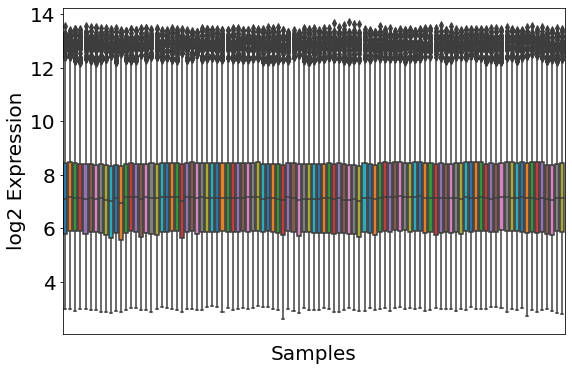

In [9]:
matplotlib.pyplot.figure(figsize=(9, 6))
g = seaborn.boxplot(data=expression.iloc[:, 1:100], palette='tab10')
g.set(xticklabels=[])
g.tick_params(bottom=False)
g.set(xlabel='Samples', ylabel='log2 Expression')
matplotlib.pyplot.show()

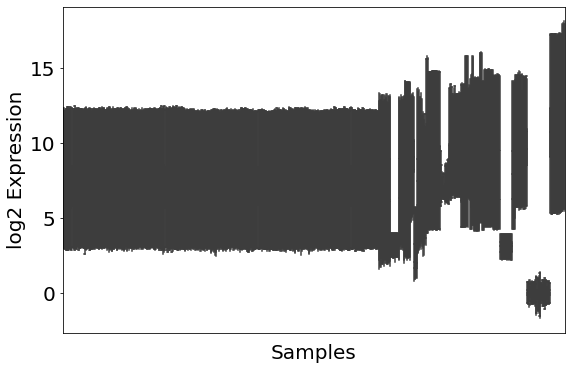

In [10]:
matplotlib.pyplot.figure(figsize=(9, 6))
g = seaborn.boxplot(data=expression.iloc[:, 1:1000], palette='tab10', showfliers=False)
g.set(xticklabels=[])
g.tick_params(bottom=False)
g.set(xlabel='Samples', ylabel='log2 Expression')
matplotlib.pyplot.show()

# 2. quantile normalization

In [11]:
def quantile_normalization(df):
    
    "Quantile normalization consists on sorting, averaging and re-ordering."
    "For more information: https://cmdlinetips.com/2020/06/computing-quantile-normalization-in-python/"
  
    # step 1/3: sorting sample values
    df_sorted = pandas.DataFrame(numpy.sort(df.values, axis=0), index=df.index, columns=df.columns)
    # step 2/3: averaging rank values across samples
    df_mean = df_sorted.mean(axis=1)
    df_mean.index = numpy.arange(1, len(df_mean) + 1)
    # step 3/3: re-ordering samples
    df.rank(method="min").astype(int)
    df_qn = df.rank(method="min").stack().astype(int).map(df_mean).unstack()

    return df_qn

In [12]:
%%time
expression_qn = quantile_normalization(expression)

CPU times: user 3.91 s, sys: 729 ms, total: 4.64 s
Wall time: 4.71 s


findfont: Font family ['FreeSans'] not found. Falling back to DejaVu Sans.


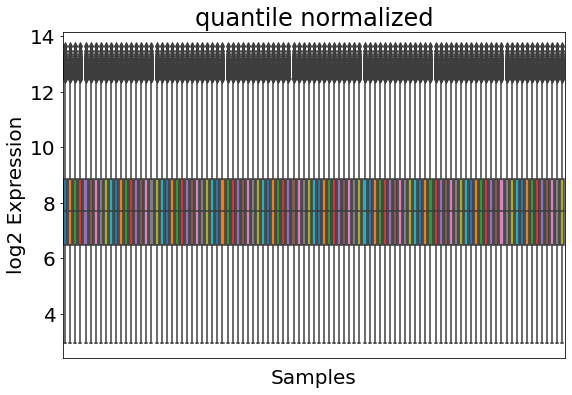

In [13]:
matplotlib.pyplot.figure(figsize=(9, 6))
g = seaborn.boxplot(data=expression_qn.iloc[:, 1:100], palette='tab10')
g.set(xticklabels=[])
g.tick_params(bottom=False)
g.set(xlabel='Samples', ylabel='log2 Expression', title='quantile normalized')
matplotlib.pyplot.show()

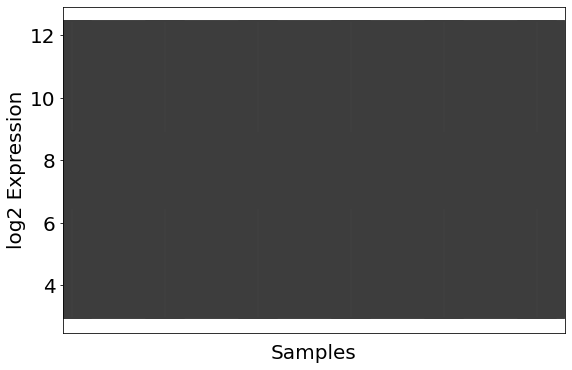

In [14]:
matplotlib.pyplot.figure(figsize=(9, 6))
g = seaborn.boxplot(data=expression_qn.iloc[:, 1:1000], palette='tab10', showfliers=False)
g.set(xticklabels=[])
g.tick_params(bottom=False)
g.set(xlabel='Samples', ylabel='log2 Expression')
matplotlib.pyplot.show()

In [15]:
transpose_expression_qn = expression_qn.transpose()
transpose_expression_qn.head()

,100,1000,10000,10005,10006,10007,10010,10013,10015,10019,...,9978,998,9984,9987,9988,9989,9990,9991,9993,9994
GSM752709.cel,6.674178,9.253471,4.348688,6.547967,8.226402,7.877847,5.749067,6.206224,10.636120,9.778866,...,10.163430,11.088139,8.392577,10.538061,7.682210,9.836996,5.061649,6.168413,6.018051,6.700115
GSM752710.cel,6.962708,9.450826,4.065701,6.769329,8.032836,7.895058,5.468747,6.288019,10.499423,9.397884,...,10.099152,11.525933,8.771970,10.807247,7.391308,9.823300,4.774275,5.997441,5.814616,6.052927
GSM752711.cel,6.274973,9.358252,4.198858,6.382631,8.411676,7.915058,6.250226,5.814616,10.653945,9.897394,...,10.110796,11.266447,8.381983,10.480788,7.975027,9.895337,4.552457,6.131025,6.048658,6.539920
GSM752712.cel,6.483298,9.347803,4.587900,6.334080,8.095503,8.000321,5.698585,5.916943,10.664650,9.821316,...,10.108416,11.124328,8.410712,10.373180,7.771491,9.835031,5.103788,6.311302,5.820957,6.340377
GSM752713.cel,7.144404,10.134623,4.490600,6.621219,8.016995,7.993288,5.666206,5.893772,10.632673,9.643835,...,10.120252,9.938836,8.628687,10.437714,7.318389,9.726615,4.523678,5.617235,6.151873,6.190025


# 3. intersect with model genes

In [18]:
%%time
model = cobra.io.load_matlab_model(model_file)

In [20]:
model_genes = [gene.id for gene in model.genes]
print(model_genes[:10])

['26.1', '314.1', '8639.1', '314.2', '1591.1', '1594.1', '10993.1', '6818.1', '89874.1', '3945.1']


# 4. define flux change rules